## Homework 2

Implement the Klienberg model (slide 37 lecture 4) and measure the delivery time exponent
1. create a periodic square lattice graph
2. add a random link to each node with probability $p_{conn}\sim r^{-\alpha}$
3. measure the graph and original lattice distance between point pairs (depending on the size of the network and the strength of your computer, you can use all pairs, from a few sources to all others, see e.g. nx.single_source_shortest_path_length(), etc.)

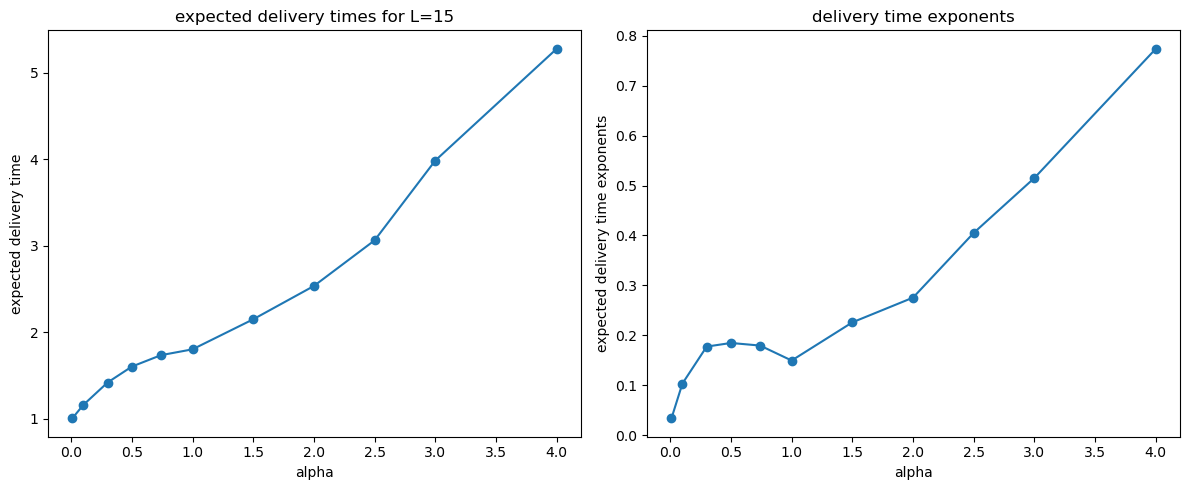

In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

def approx_avg_shortest_path_length(G, num_samples=10):
    samples = random.sample(list(G.nodes()), num_samples)
    lengths = []
    for sample in samples:
        paths = nx.single_source_shortest_path_length(G, sample)
        lengths.extend(paths.values())
    return np.mean(lengths)

Ls = [5, 10, 15, 20, 30]
alphas = [0.01, 0.1, 0.3, 0.5, 0.74, 1, 1.5, 2, 2.5, 3, 4]
Ts4alphas = [[] for _ in alphas]
L15_Ts = []

for L in Ls:
    lattice = nx.grid_2d_graph(L, L, periodic=True)

    delivery_times = []
    for i, alpha in enumerate(alphas):
        lattice_mod = lattice.copy()
        all_nodes = set(lattice.nodes())
        visited = set()
        for node in all_nodes:
            if node in visited:
                continue
            visited.add(node)
            neighbors = set(lattice.neighbors(node))
            others = all_nodes - neighbors - visited
            for other in others:
                if np.random.rand() < (nx.shortest_path_length(lattice, source=node, target=other) ** -alpha):
                    lattice_mod.add_edge(node, other)

        avg_path_length = approx_avg_shortest_path_length(lattice_mod, 10)
        delivery_times.append(avg_path_length)
    
        Ts4alphas[i].append(avg_path_length)
    
    if L == 15:
        L15_Ts = delivery_times.copy()

x = [np.polyfit(np.log(Ls), np.log(Ts4alphas[i]), 1)[0] for i in range(len(alphas))]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(alphas, L15_Ts, 'o-')
ax1.set_xlabel('alpha')
ax1.set_ylabel('expected delivery time')
ax1.set_title('expected delivery times for L=15')

ax2.plot(alphas, x, 'o-')
ax2.set_xlabel('alpha')
ax2.set_ylabel('expected delivery time exponents')
ax2.set_title('delivery time exponents')

plt.tight_layout()
plt.show()

